## ANALYSIS
---
- better understand the data
- find errors in the data
- find distributions and trends for various features



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Any
from pathlib import Path
from os import listdir, getcwd
from datetime import datetime
from collections import Counter

import ipynb
# uncomment to run data_curation.ipynb
# import ipynb.fs.full.preprocessing as nb1

In [83]:
# load dataset
datasets = Path(getcwd()).joinpath('datasets')

data_ = datasets.joinpath('library_cleaned.csv')
data = pd.read_csv(data_)
df = pd.DataFrame(data).convert_dtypes(infer_objects=True, convert_string=True, convert_integer=True, convert_floating=True)
df['themes'] = df['themes'].apply(lambda x: str(x).replace(", ", ","))
df

,Unnamed: 0,id,release_dates,name,category,slug,platforms,genres,tags,age_ratings,rating,rating_count,similar_games,themes,summary,publishers/developers
0,0,2181,2006,Wii Sports,main_game,wii-sports,Wii,"simulation,sport","40,268435469,268435470,536870932,536870942,536...",E,74.8,301,"'Tekken 3','Tekken 5','Journey','Wii Sports Re...",party,Bowl like a pro or go for that home run... Ex...,nintendo
1,1,358,1987,Super Mario Bros.,main_game,super-mario-bros,"Wii,NES,3DS,Wii U,FDS,Arcade,FC","platformer,adventure","1,268435464,268435487,536870928,536871049,5368...",E,83.95,1041,"'Zelda II: The Adventure of Link','The Legend ...",action,A side scrolling 2D platformer and first entry...,"playtronic,nintendo"
2,2,2183,2008,Mario Kart Wii,main_game,mario-kart-wii,Wii,racing,"1,27,40,268435466,536870937,536871192,53687298...",E,80.18,458,"'Wreckfest','Cocoto Kart Racer','Borderlands 3...","action,comedy,party",Mario Kart Wii is a multiplayer-oriented racin...,nintendo
3,3,2182,2009,Wii Sports Resort,main_game,wii-sports-resort,Wii,sport,"40,268435470,536870942,536870970,536871186,536...",E,78.66,137,"'Wii Sports','Wii Play','Wii Fit','Wii Fit Plu...",party,Set off on a journey to a tropical island wher...,nintendo
4,4,1076,2006,New Super Mario Bros.,main_game,new-super-mario-bros,"DS,Wii U","platformer,adventure","1,268435464,268435487,536870928,536871049,5368...",E,82.09,287,"'Super Mario Bros.','The Legend of Zelda: Twil...",action,New Super Mario Bros. is a side-scrolling 2.5D...,"nintendo,ique"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,157,2028,2010,Elven Legacy,main_game,elven-legacy,Windows,"rpg,strategy,tbs","17,268435468,268435471,268435472,536871818,536...",T,60.0,3,"'Might & Magic Heroes VII','Sorcerer King','Te...",fantasy,The shadows of destruction begin to loom on th...,paradox interactive
3677,158,1593,2015,Pillars of Eternity,main_game,pillars-of-eternity,"Linux,Windows,Mac,PS4,NS","rpg,strategy,adventure,indie","17,268435468,268435471,268435487,268435488,536...",M,81.5,244,"'Dragon Age: Origins','Dragon Age II','The Eld...",fantasy,Prepare to be enchanted by a world where the c...,"paradox interactive,obsidian entertainment"
3678,159,1840,2007,Neverwinter Nights 2: Mask of the Betrayer,expansion,neverwinter-nights-2-mask-of-the-betrayer,Windows,"rpg,tactical","17,268435468,268435480,536871138,536871409,536...",T,86.44,32,"""Baldur's Gate II: Shadows of Amn"",'Neverwinte...",fantasy,Following the climactic battle against the Kin...,"atari,infogrames entertainment,obsidian entert..."
3679,160,78777,2000,Legoland,main_game,legoland,Windows,"simulation,strategy","1,33,34,268435469,268435471,536871291,53687306...",E,74.88,5,"'Star Control: Origins','Force of Nature','Sol...","action,sandbox,educational",Legoland is an educational game that shows how...,"lego media,krisalis software"


In [85]:
year_counts = Counter(df['release_dates'].tolist())
year_count_df = pd.DataFrame({'Release Year': year_counts})
year_count_df

,Release Year
1978,1
1980,2
1981,4
1982,3
1983,7
1984,2
1985,9
1986,12
1987,6
1988,4


In [86]:
labels = year_count_df.index.tolist()
frequencies =  year_count_df['Release Year'].tolist()

min_year = 1978
last_year_before_esrb = 1994

pre_esrb_labels = [i for i in labels if min_year <= i <= last_year_before_esrb]
pre_esrb_frequencies = year_count_df.loc[1978:1994]['Release Year']

Text(0, 0.5, 'Count')

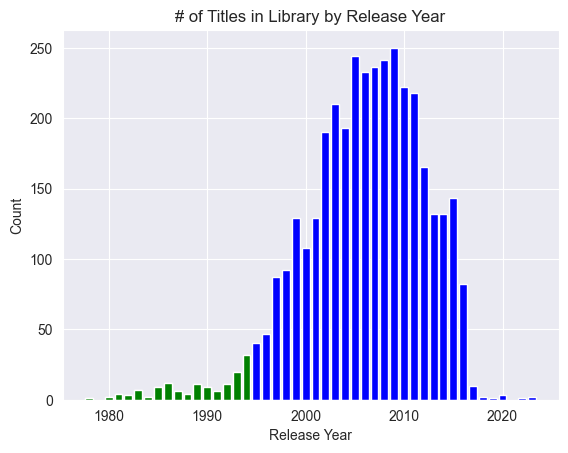

In [87]:
plt.bar(labels, frequencies, color='blue')
plt.bar(pre_esrb_labels, pre_esrb_frequencies, color='green')
plt.title("# of Titles in Library by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")

We note that the majority of titles in our data were released between the late 90s and mid 2010s. This is to be expected because we removed titles with null age ratings, since it is a necessary feature of our data. This means that any title that pre-dates any age_rating system (like the ESRB) was likely filtered out during preprocessing.
The titles that were not filtered out from this period of time are labeled in green, and exist likely because they were ported to newer systems after the ESRB was formed, and received a retrospective age rating then.

Also take note that the library doesn't contain many games after the late 2010s, which we may want to remedy when curating more data.

In [88]:
genre_lists = df['genres'].str.split(',').explode().tolist()
genre_counts = Counter(genre_lists)
genre_count_df = pd.DataFrame({'genre': genre_counts})
genre_count_df = genre_count_df.sort_values(by='genre', ascending=True)
genre_count_df

,genre
moba,1
pinball,8
quiz/trivia,39
card/board,41
visual novel,50
indie,61
point-and-click,80
rhythm,94
tactical,148
tbs,150


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600')])

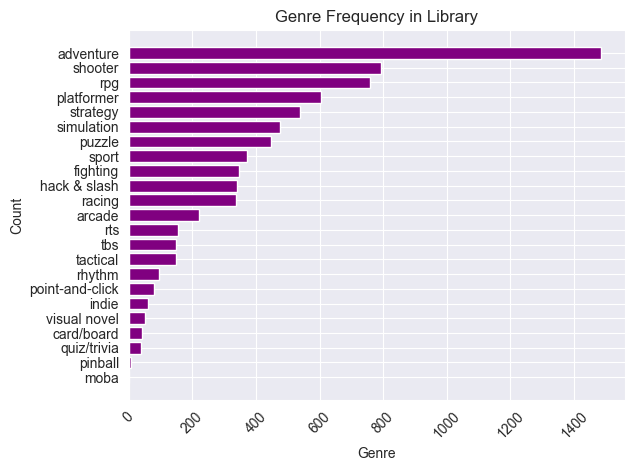

In [96]:
plt.barh(genre_count_df.index.tolist(), genre_count_df.genre.to_list(), color='purple')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Genre Frequency in Library')
plt.xticks(rotation=45)
# plt.yticks(rotation=90)

Based on the distribution of genres in the library, we see that it is dominated by adventure, with the next most frequent genres being shooter and rpg, at nearly half the amount as adventure. This could be a result of adventure being a common genre for games in general. Comparatively, we have few moba and pinball titles.

We note the genres that appear most frequently in the library are more action-oriented in nature, like shooter, adventure, rpg, sport, fighting, etc. Whereas genres that are less associated with action, like puzzle, point-and-click, card/board are in general less common. If we use the data in this present form, we may result in a model that provides more accurate results for users with action-oriented preferences, since the pool of titles is larger for this category, the opposite is also true for genres that are not as action-focused. During our initial exploration of the features of our data, we concluded that the themes and genres of a title provide some of the most descriptive information when recommending titles. In other words, weighing these features more heavily provided better results, hence they may serve as more important features than release_date or age_rating perhaps.

Ideally, we'd want this distribution to be uniform, so that each genre would have an equal pool of titles to recommend from, but it is likely that this distribution similar for all games in general. Finding 1400 moba games to make up for this offset will likely be unfeasible.

It's also worth noting that we have other features that may offset this issue to some degree. We must keep this in mind going forward when adjusting our weights for features.


Next, let's inspect the correlation heatmap of genres to see which genres are most often associated with each other.

In [112]:
genre_lists = df['genres'].str.split(',').tolist()

# Create a set of unique genres
unique_genres = set(genre for genres in genre_lists for genre in genres)

# Create a new DataFrame with one-hot encoding for genres
one_hot_df = pd.DataFrame(0, columns=list(unique_genres), index=df.index)

for index, genres in enumerate(genre_lists):
    one_hot_df.loc[index, genres] = 1

correlation_matrix = one_hot_df.corr()

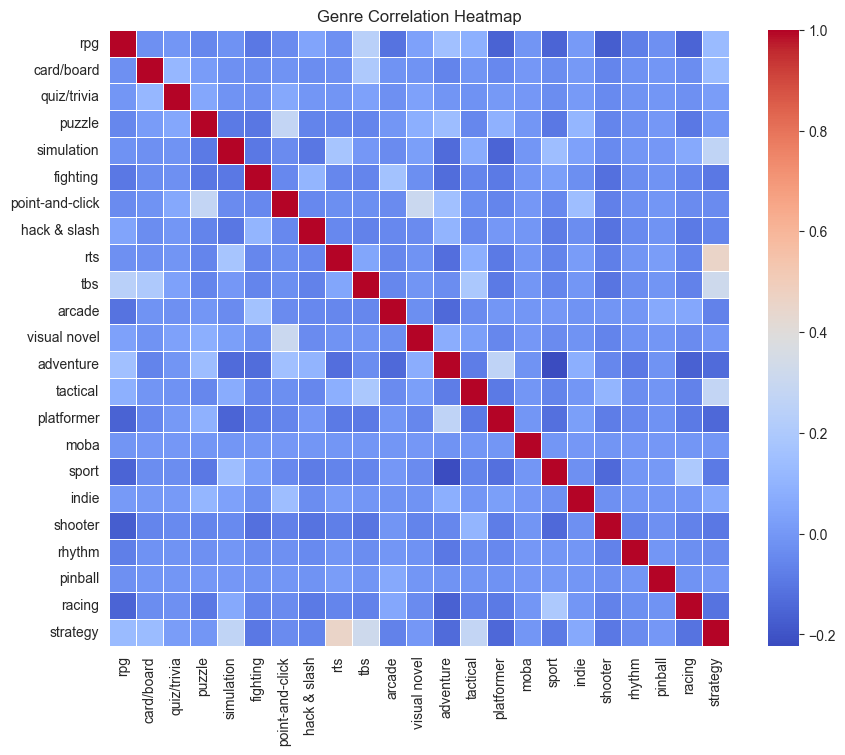

In [113]:
cmap = 'coolwarm'
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap=cmap, linewidths=0.5)
plt.title("Genre Correlation Heatmap")
plt.show()

Observe that, rather unsurprisingly, 'real-time strategy' and 'strategy' have the strongest relation between the genres, which makes sense since there is a fair bit of overlap between the two. We also find that 'point-and-click' and 'visual novel' also have a fairly decent correlation.

Also, of note are the genres with the lowest correlations, which more or less reinforces our theory about which genres seldom coexist, though perhaps not as strongly as we'd imagined. For example, we seldom see sports games that are also adventure games, RPG's, or simulation games that are also platformers. But we do observe a stronger relationship between platformers and adventure games, as well as strategy simulation games.


In [91]:
theme_lists = df['themes'].str.split(',').explode().tolist()
theme_counts = Counter(theme_lists)
theme_count_df = pd.DataFrame({'themes': theme_counts})
theme_count_df = theme_count_df.sort_values(by='themes', ascending=True)
theme_count_df

,themes
erotic,6
4x,22
romance,25
thriller,42
business,43
educational,56
drama,65
mystery,71
stealth,144
survival,165


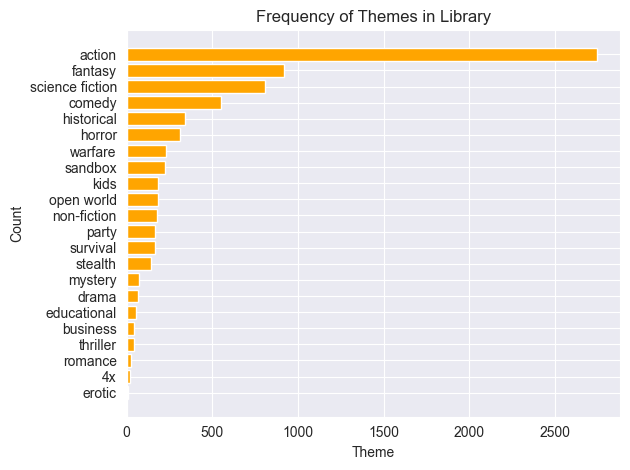

In [97]:
plt.barh(theme_count_df.index.tolist(), theme_count_df.themes.to_list(), color='orange')
plt.ylabel('Count')
plt.xlabel('Theme')
plt.title('Frequency of Themes in Library')
# plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()

Overall the distribution of themes is more skewed than genres in terms of frequency, but the various elements that describes these themes appears to be a bit more varied than what we observed with the distribution of genres. For example, there is a nice degree of variation among the most common themes, such as action, fantasy, sci-fi, horror, comedy, party, etc. We can see just how interrelated these themes are to one another by taking a look at the correlation heatmap of this feature.

In [101]:
theme_lists = df['themes'].str.split(',').tolist()

# Create a set of unique genres
unique_themes = set(theme for themes in theme_lists for theme in themes)

# Create a new DataFrame with one-hot encoding for genres
one_hot_df = pd.DataFrame(0, columns=list(unique_themes), index=df.index)

for index, themes in enumerate(theme_lists):
    one_hot_df.loc[index, themes] = 1

correlation_matrix = one_hot_df.corr()

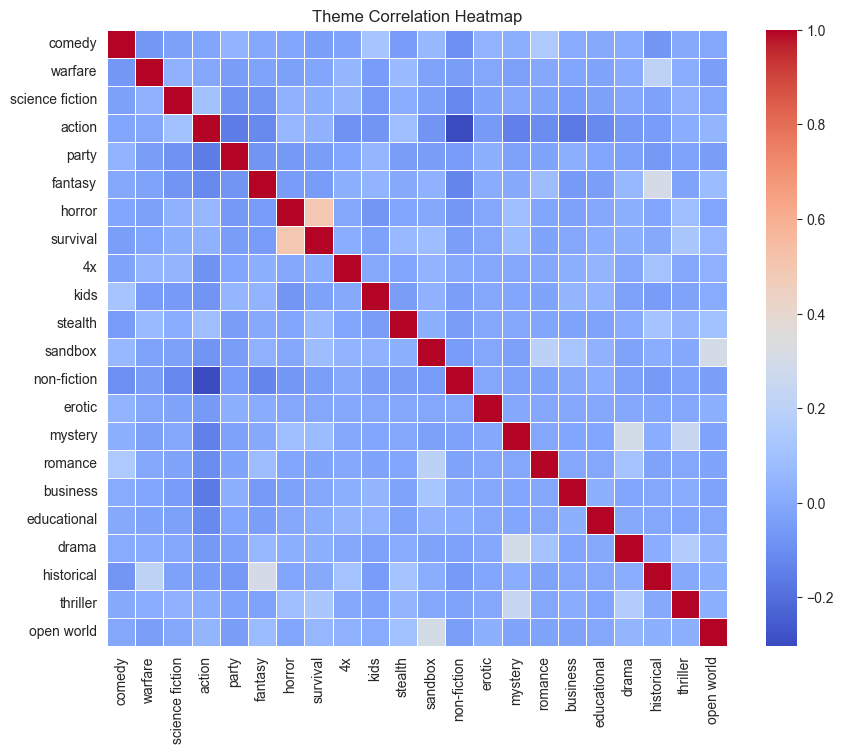

In [111]:
cmap = 'coolwarm'
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap=cmap, linewidths=0.5)
plt.title("Theme Correlation Heatmap")
plt.show()

Based on the correlation value scale to the right of the heatmap, we see that lighter pink sqaures represent a stronger correlation between themes, and light blue represents themes that are less related.

Note that 'survival' and 'horror' themes have one of the strongest correlations among the data (0.5 - 0.6). Some consider 'survival-horror' to be its own genre, so it makes sense that these share a stronger relationship than most other pairs of themes. Some other notable correlations include those between 'open-world' and 'sandbox', 'historical' and 'fantasy', as well as 'mystery' and 'drama'.

What may be more useful to extract from this graph are the least correlated themes, the most prominent being 'action' and 'non-fiction'. This implies that most action-oriented titles do not contain themes of non-fiction and vice versa. One may extrapolate that games with action-oriented themes are also fictional in nature, which makes sense. We can also see that action-oriented titles aren't often paired with themes of mystery, romance, business or education, which seems pretty logical.